# Southern is the most affected district by larceny and theft

Our target in the study of the sanfrancisco_incidents_summer_2014 dataset is to identify the district that is most affected by incidents and the type of incidents that are most common on it. This analysis tries to simulate what a local law enforcement group could do to plan a strategy.

To start, we will import all libraries we need, read the dataset, print out some values to get a feeling of the data get some basic numbers, such as the amount of records, amount of invalid values and a list of districts and incident categories.

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, matplotlib.image as mpimg, matplotlib.gridspec as gridspec
import seaborn as sns

%matplotlib inline

In [70]:
sf_raw = pd.read_csv('sanfrancisco_incidents_summer_2014.csv')

In [71]:
print "record length:\t" + str(sf_raw.shape[0])
print "feature length:\t" + str(sf_raw.shape[1]-1)
print "NA count:\t" + str(sf_raw.isnull().sum().sum())
print "category list:\n" + str(sf_raw.iloc[0:,1:2].drop_duplicates().sort_values('Category').values)
print "district list:\n" + str(sf_raw.iloc[0:,6:7].drop_duplicates().sort_values('PdDistrict').values)


record length:	28993
feature length:	12
NA count:	0
category list:
[['ARSON']
 ['ASSAULT']
 ['BRIBERY']
 ['BURGLARY']
 ['DISORDERLY CONDUCT']
 ['DRIVING UNDER THE INFLUENCE']
 ['DRUG/NARCOTIC']
 ['DRUNKENNESS']
 ['EMBEZZLEMENT']
 ['EXTORTION']
 ['FAMILY OFFENSES']
 ['FORGERY/COUNTERFEITING']
 ['FRAUD']
 ['GAMBLING']
 ['KIDNAPPING']
 ['LARCENY/THEFT']
 ['LIQUOR LAWS']
 ['LOITERING']
 ['MISSING PERSON']
 ['NON-CRIMINAL']
 ['OTHER OFFENSES']
 ['PORNOGRAPHY/OBSCENE MAT']
 ['PROSTITUTION']
 ['ROBBERY']
 ['RUNAWAY']
 ['SECONDARY CODES']
 ['STOLEN PROPERTY']
 ['SUICIDE']
 ['SUSPICIOUS OCC']
 ['TRESPASS']
 ['VANDALISM']
 ['VEHICLE THEFT']
 ['WARRANTS']
 ['WEAPON LAWS']]
district list:
[['BAYVIEW']
 ['CENTRAL']
 ['INGLESIDE']
 ['MISSION']
 ['NORTHERN']
 ['PARK']
 ['RICHMOND']
 ['SOUTHERN']
 ['TARAVAL']
 ['TENDERLOIN']]


In [72]:
sf_raw.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,140734311,ARSON,ARSON OF A VEHICLE,Sunday,08/31/2014,23:50,BAYVIEW,NONE,LOOMIS ST / INDUSTRIAL ST,-122.405647,37.738322,"(37.7383221869053, -122.405646994567)",14073431126031
1,140736317,NON-CRIMINAL,LOST PROPERTY,Sunday,08/31/2014,23:45,MISSION,NONE,400 Block of CASTRO ST,-122.435012,37.761768,"(37.7617677182954, -122.435012093789)",14073631771000
2,146177923,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,23:30,SOUTHERN,NONE,1000 Block of MISSION ST,-122.409795,37.780036,"(37.7800356268394, -122.409795194505)",14617792306244
3,146177531,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,23:30,RICHMOND,NONE,FULTON ST / 26TH AV,-122.485263,37.772518,"(37.7725176473142, -122.485262988324)",14617753106244
4,140734220,NON-CRIMINAL,FOUND PROPERTY,Sunday,08/31/2014,23:23,RICHMOND,NONE,800 Block of LA PLAYA ST,-122.509895,37.772313,"(37.7723131976814, -122.509895418239)",14073422072000


### Analysis

With that first review, we can start getting a sense out of the rows of values.

This first graph shows the amount of incidents per district, ordered from highest to lowest rate. Southern jumps out very clearly as the district most affected by incidents.

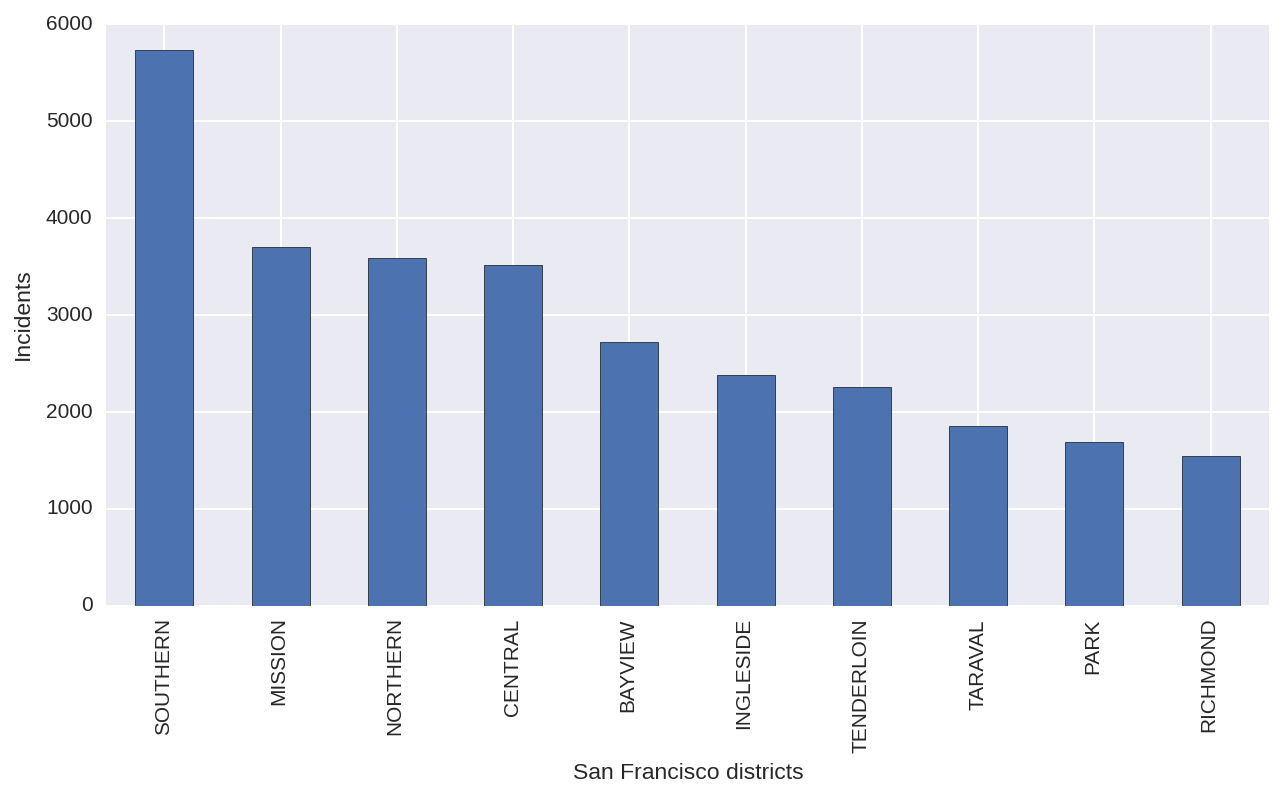

In [73]:
plt.figure(num=None, figsize=(10, 5), dpi=150, facecolor='w', edgecolor='k')
sf_raw.PdDistrict.value_counts().plot(kind="bar")
plt.xlabel("San Francisco districts")
plt.ylabel("Incidents")

If we would like to tackle the incidents with highest impact, we would need to know what types of incidents are most common so that law enforcement can focus their efforts on it. The following plot shows the distribution of incidents by category and also by district. Larceny and theft (combined in a single category in the dataset) jump out at the first look. There is a single box that calls for attention: the amount of larceny and theft in the Southern district. The plot also shows that Northern and Central would also be on the radar.

The color gradient does not help in understanding exact values right away, but draws the eye to the most important boxes. We will get more detail in the next step.

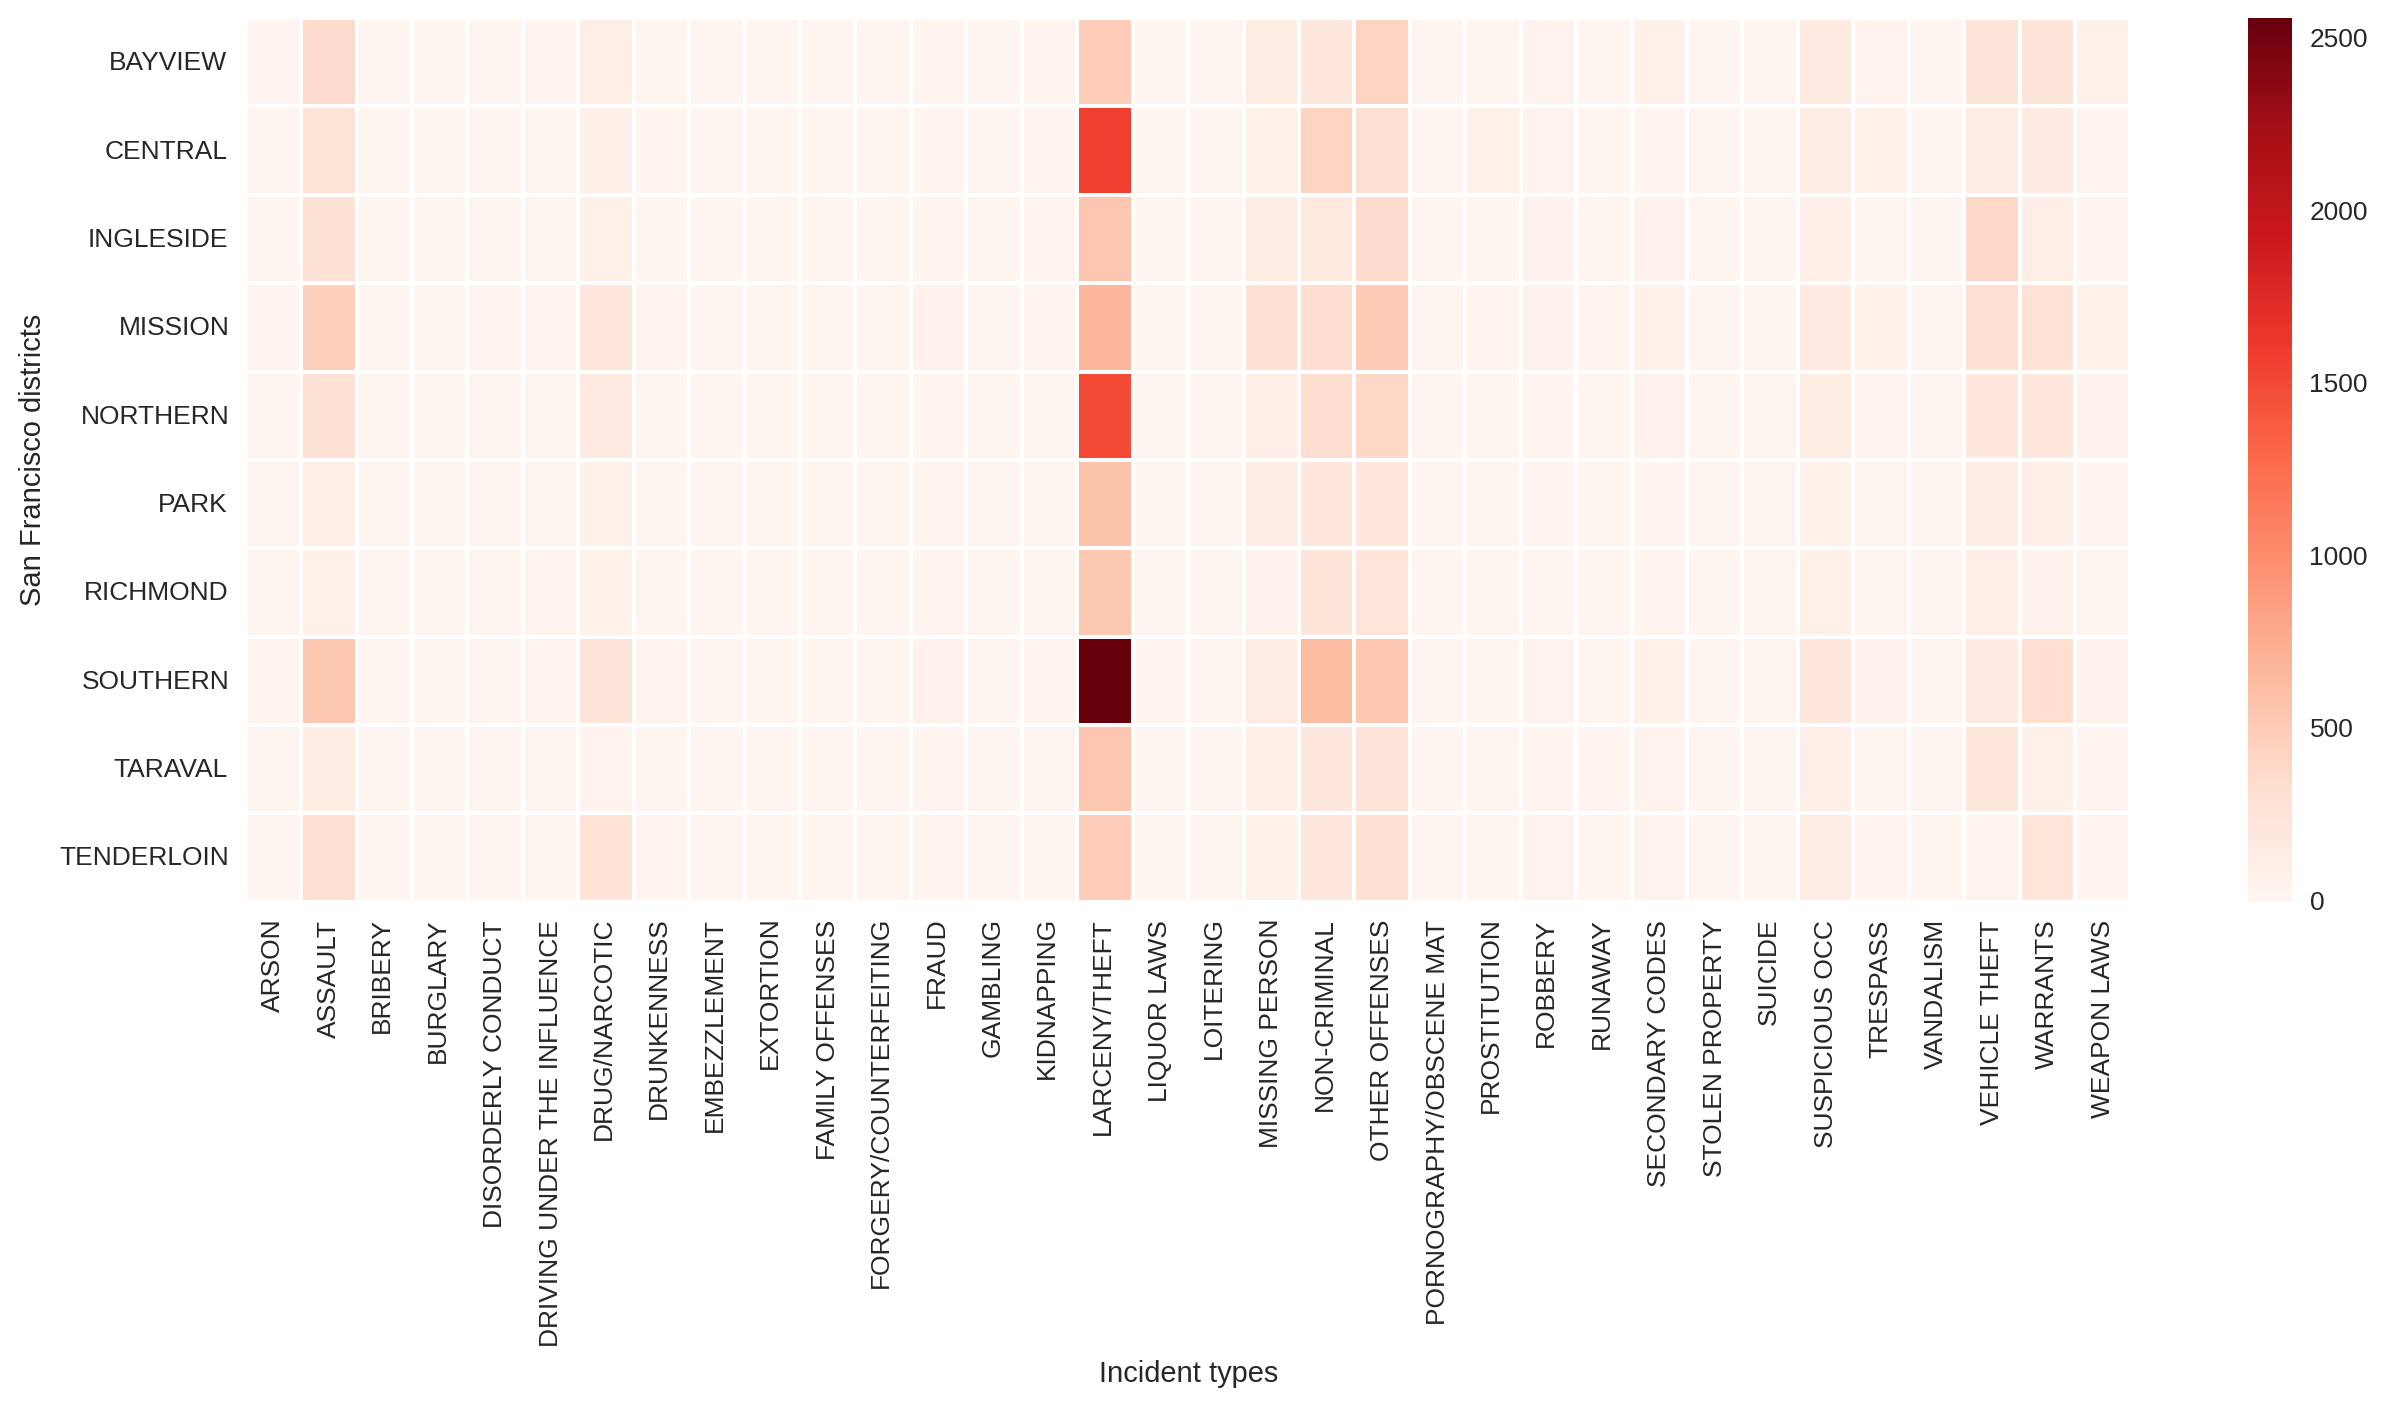

In [74]:
sf_dist_cat = sf_raw.groupby(['PdDistrict', 'Category'])['Location'].count()
sf_heat = sf_dist_cat.unstack(level=1).fillna(0)
plt.figure(num=None, figsize=(16, 6), dpi=190, facecolor='w', edgecolor='k')
sns.heatmap(sf_heat,  linewidths=.5, 
              cmap=plt.get_cmap("Reds"))
plt.xlabel("Incident types")
plt.ylabel("San Francisco districts")

One key aspect required to tackle the problem is the surface area of the affected districts. The following map shows the relative amount of larceny and theft incidents across districts, both numerically and compared over a map. The district limits in underlying map are plotted by coloring individual incidents. Southern is not only the most affected one, but its incidents are restricted to a relatively small area compared to other districts such as Taraval or Bayview. On top of that, these two districts have as much incidents as Tenderloin, a much smaller district. 

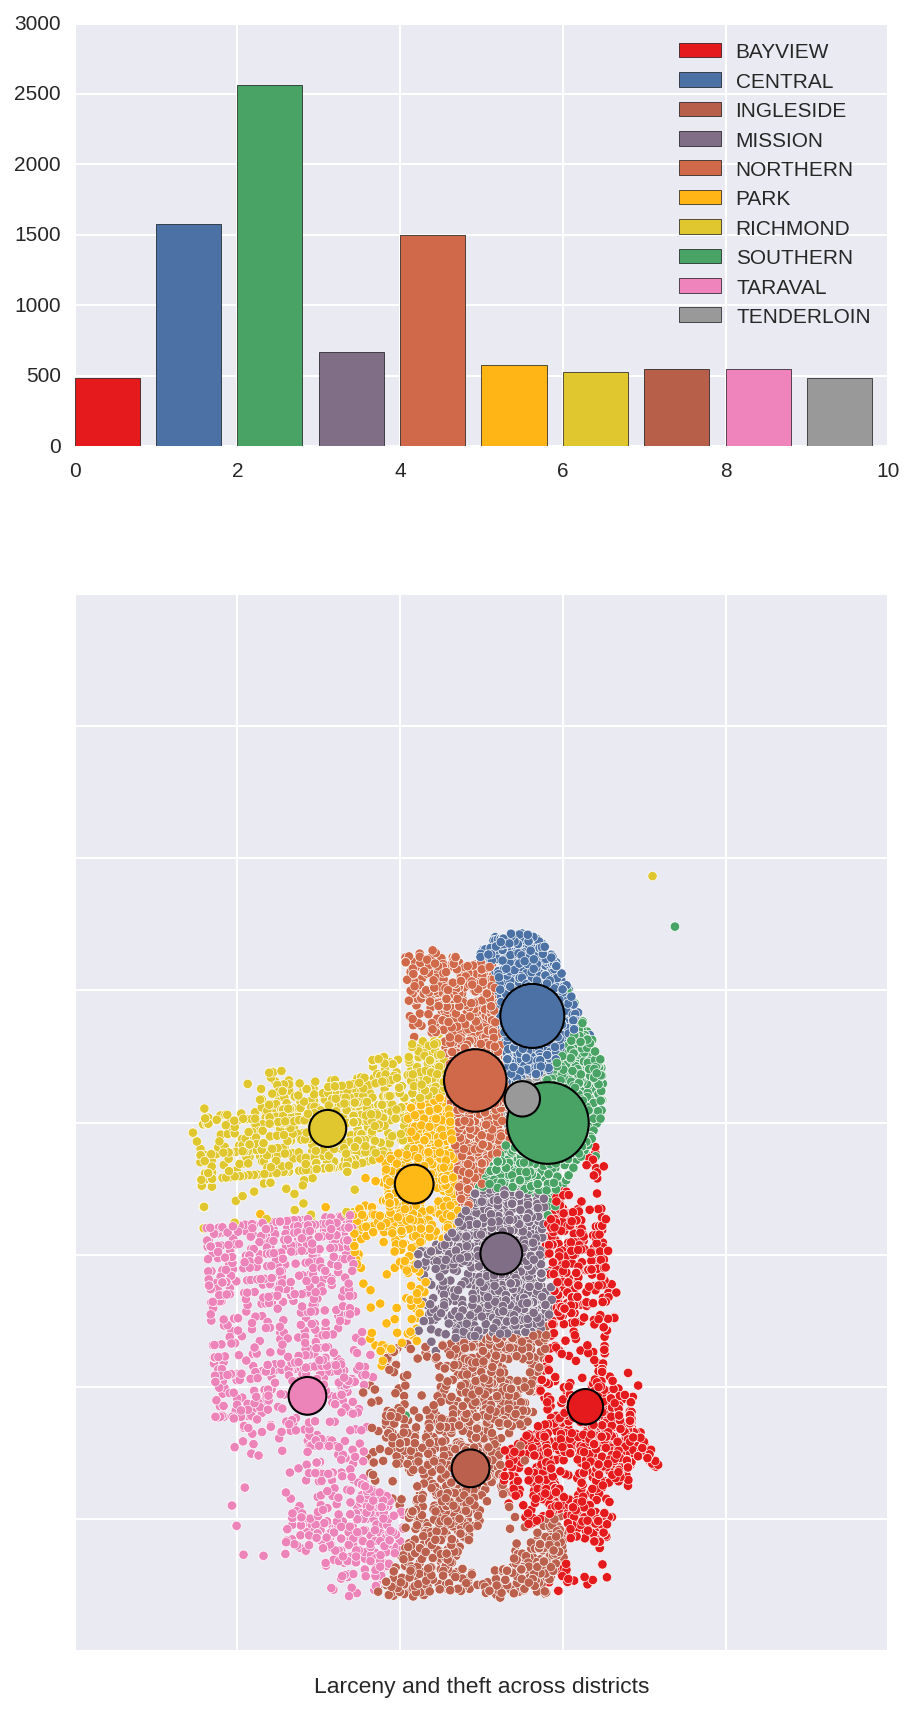

In [77]:
# relative size of circles
relSize = 0.6
# manual color indexing of districts
colorIndexesDict = {'BAYVIEW': 0,
     'CENTRAL': 1, 
     'INGLESIDE': 7,
     'MISSION': 3,
     'NORTHERN': 4,
     'PARK': 5,
     'RICHMOND': 6,
     'SOUTHERN': 2,
     'TARAVAL': 8,
     'TENDERLOIN': 9}
colorIndex = pd.DataFrame.from_dict(colorIndexesDict, orient = 'index')
colorIndex.columns = ['colorIndex']

sf_district_center = sf_raw.groupby('PdDistrict')['X', 'Y'].mean()
sf_district_count = sf_raw[sf_raw.Category == 'LARCENY/THEFT'].assign(c1 = lambda x: 1).groupby('PdDistrict')['c1'].count()
sf_district = sf_district_center.join(sf_district_count)
sf_district_colors = sf_district.join(colorIndex)


s1 = plt.get_cmap("Set1")


plt.figure(num=None, figsize=(14, 14), dpi=150, facecolor='w', edgecolor='k')
gs = gridspec.GridSpec(2, 1,
                       width_ratios=[1, 1],
                       height_ratios=[2, 5]                       )

ax2 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])


ax1.scatter(x=sf_raw.X.values,
              y=sf_raw.Y.values,
              edgecolor="white",
              c=sf_raw.PdDistrict.map(colorIndexesDict),
              cmap=plt.get_cmap("Set1"))

p2 = ax1.scatter(x=sf_district.X.values, 
                 y=sf_district.Y.values,
                 s = sf_district.c1 * relSize,
                 edgecolor="black",
                 linewidths =1,
                 c=sf_district_colors.colorIndex,
                 cmap=plt.get_cmap("Set1"))

for d in sf_district.index.values:
    ax2.bar  (sf_district_colors[sf_district_colors.index == d].colorIndex.values,
              sf_district_colors[sf_district_colors.index == d].c1.values, 
              edgecolor="black",
              color=s1((sf_district_colors[sf_district_colors.index == d].colorIndex.values) * 255 / 9),
              label=d)

ax2.legend(sf_district.index.values, fontsize ='medium', markerscale = 3)

locs, labels = plt.xticks()
plt.xticks(locs, [])
locs, labels = plt.yticks()
plt.yticks(locs,[])
plt.xlabel("Larceny and theft across districts")
